# Basic classification: Classify images of clothing

## Data Loading

In [47]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

### Import the Fashion MNIST dataset

Fashion MNIST dataset which contains 70,000 grayscale images in 10 categories. The images show individual articles of clothing at low resolution (28 by 28 pixels)

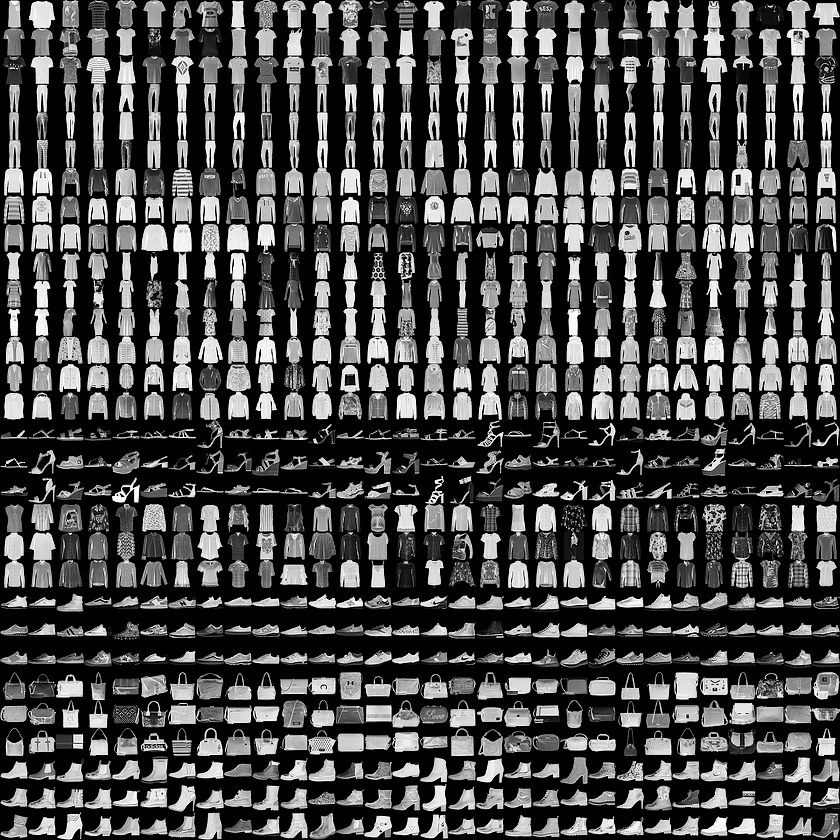

In [48]:
data = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = data.load_data()

The images are 28x28 NumPy arrays, with pixel values ranging from 0 to 255. The labels are an array of integers, ranging from 0 to 9. These correspond to the class of clothing the image represents:

0	Top
1	Trouser
2	Pullover
3	Dress
4	Coat
5	Sandal
6	Shirt
7	Sneaker
8	Bag
9	Ankle boot

In [49]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [50]:
print(train_images[7])

[[  0   0   0   0   0   1   1   0   0   0   0  63  28   0   0   0  33  85
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   2   0   0  28 126 241 255 255 255 255 255 255 252
  248 111   0   0   0   2   0   0   0   0]
 [  0   0   0   0   2   0   0 206 244 251 241 230 238 221 205 230 240 230
  239 251 233 165   0   0   2   0   0   0]
 [  0   0   0   1   0   0 199 251 228 234 233 236 235 245 247 237 234 239
  230 230 235 255 176   0   0   1   0   0]
 [  0   0   0   0   0  81 254 226 228 239 237 236 234 232 233 235 235 236
  239 237 233 225 246  73   0   0   0   0]
 [  0   0   3   0   0 255 235 239 223 234 238 236 237 236 235 235 235 235
  236 235 234 230 231 255  24   0   4   0]
 [  0   0   0   0 177 239 223 254 223 232 234 234 236 236 235 235 235 235
  235 234 231 233 222 246  88   0   1   0]
 [  0   0   0   0 234 239 229 255 220 232 233 232 234 235 235 235 235 235
  234 233 232 230 228 254 140   0   0   0]
 [  0   0   0   0 225 240 226 255 221 227 232 228 231 230 228 22

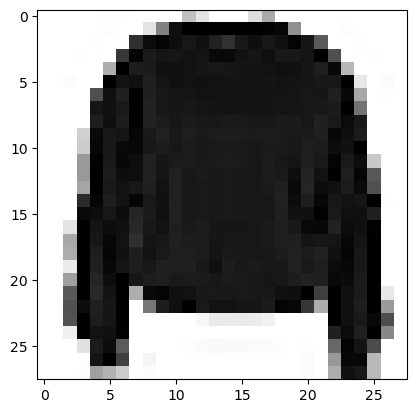

In [51]:
plt.imshow(train_images[7], cmap = plt.cm.binary)
plt.show()

shrinking data down to scale it down

In [52]:
train_images = train_images/255
test_images = test_images/255

## Model

In [53]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)), # 784 neurons 28x28 input layer
    keras.layers.Dense(128, activation='relu'), # 128 neurons hidden layer
    keras.layers.Dense(10, activation = 'softmax') # 10 neurons == 10 labels
])

In [56]:
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4972 - accuracy: 0.8246
Epoch 2/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.3757 - accuracy: 0.8649
Epoch 3/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.3370 - accuracy: 0.8765
Epoch 4/10
1875/1875 [==============================] - 44s 23ms/step - loss: 0.3111 - accuracy: 0.8863
Epoch 5/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.2946 - accuracy: 0.8922
Epoch 6/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.2803 - accuracy: 0.8967
Epoch 7/10
1875/1875 [==============================] - 48s 26ms/step - loss: 0.2655 - accuracy: 0.9022
Epoch 8/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.2542 - accuracy: 0.9049
Epoch 9/10
1875/1875 [==============================] - 51s 27ms/step - loss: 0.2461 - accuracy: 0.9088
Epoch 10/10
1875/1875 [==============================] - 48s 25ms/

In [57]:
test_loss, test_Acc = model.evaluate(test_images, test_labels)
print('Test Accuracy: ', test_Acc)

313/313 [==============================] - 2s 6ms/step - loss: 0.3307 - accuracy: 0.8854
Test Accuracy:  0.8853999972343445


## Predictions

In [59]:
preds = model.predict(test_images)
preds

313/313 [==============================] - 3s 8ms/step


array([[3.58903463e-07, 2.16584906e-09, 8.07828187e-08, ...,
        1.73414350e-02, 9.87083922e-07, 9.81990337e-01],
       [2.55130690e-05, 3.61406082e-13, 9.97526288e-01, ...,
        9.84160220e-18, 3.84477872e-09, 6.59976969e-14],
       [2.63524118e-08, 9.99999940e-01, 1.36646906e-13, ...,
        1.85875200e-19, 3.47755158e-11, 1.49388612e-18],
       ...,
       [7.36306731e-08, 3.18266653e-13, 1.41751258e-07, ...,
        3.39357232e-12, 9.99995887e-01, 1.07486374e-13],
       [2.81935297e-09, 9.99967277e-01, 3.73403530e-11, ...,
        3.06406706e-11, 7.03592873e-09, 1.72194342e-10],
       [4.16551529e-06, 4.06802547e-09, 2.51550364e-06, ...,
        2.53579649e-03, 3.63478466e-05, 1.81020494e-06]], dtype=float32)

In [60]:
preds[0]

array([3.5890346e-07, 2.1658491e-09, 8.0782819e-08, 3.7055042e-08,
       1.3661611e-09, 6.6671870e-04, 6.6888710e-08, 1.7341435e-02,
       9.8708392e-07, 9.8199034e-01], dtype=float32)

In [61]:
np.argmax(preds[0])

9

In [62]:
bruh = class_names[np.argmax(preds[0])]
bruh

'Ankle boot'

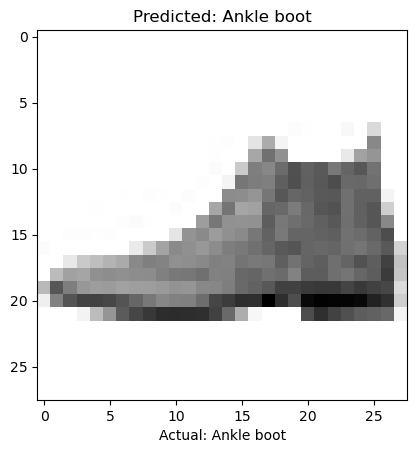

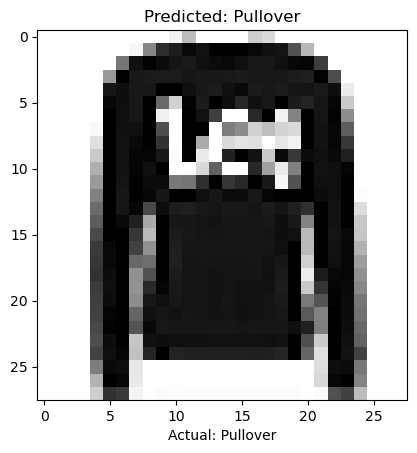

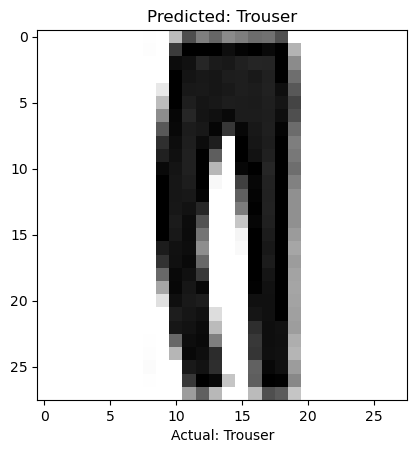

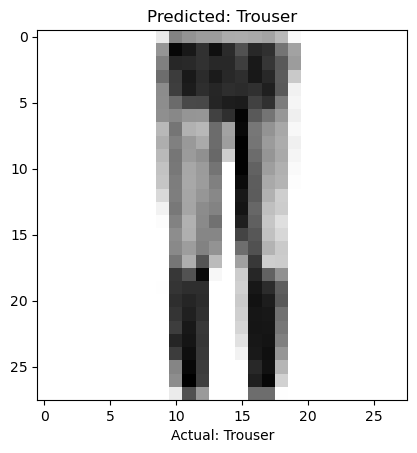

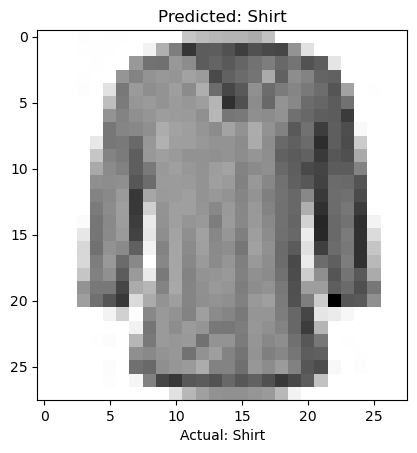

In [64]:
for i in range(5):
    plt.grid(False)
    plt.imshow(test_images[i], cmap = plt.cm.binary)
    plt.xlabel('Actual: ' + class_names[test_labels[i]])
    plt.title('Predicted: ' + class_names[np.argmax(preds[i])])
    plt.show()